**The Procrastination Project. Analysis of the Procrastinate Pro+ application**

We have to analyze the Procrastinate Pro+ application in order to identify possible reasons for the lack of profit from the application and the unprofitability of the advertising company.

**The main goal of the project** is to find possible reasons for the lack of profit from the application and the unprofitability of the advertising company. It is necessary to analyze the features of the use of the application by the user, the period of the first purchases, the total revenue from each client, the payback period and what factors negatively affect the attraction of users.

**Project structure:**
    
<a href='#1'><h5>1. Loading data and preparing it for analysis </a>
<a href='#2'><h5>2. Creating functions for calculating and analyzing LTV, ROI, retention and conversions </a>
<a href='#3'><h5>3. Research data analysis </a>
<a href='#4'><h5>4. Marketing </a>
<a href='#5'><h5>5. Evaluation of the payback of advertising </a>
<a href='#6'><h5>6. General conclusion </a>

## 1. Loading data and preparing it for analysis <a id='1'></a>

Upload data about visits, orders and expenses to variables. Optimizing the data for analysis. Let's make sure that the data type in each column is correct.

In [1]:
# loading libraries

import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# loading data

visits_log = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders_log = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs_marketing = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
# output the table header
visits_log.head(3)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


In [4]:
# data types
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders_log.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


In [6]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs_marketing.head(3)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


In [8]:
costs_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
# let's check the data for obvious duplicates

print('Obvious duplicates visits', visits_log.duplicated().sum()) #  ['name'].unique()
print('Obvious duplicates orders', orders_log.duplicated().sum()) #  ['name'].unique()
print('Obvious duplicates costs', costs_marketing.duplicated().sum()) #  ['name'].unique()

Obvious duplicates visits 0
Obvious duplicates orders 0
Obvious duplicates costs 0


In [10]:
# rename the columns, convert them to lowercase

visits_log.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders_log.columns = ['user_id', 'event_dt', 'revenue']
costs_marketing.columns = ['dt', 'channel', 'costs']

In [11]:
# let's check the changes made

print(visits_log.columns.values)
print(orders_log.columns.values)
print(costs_marketing.columns.values)

['user_id' 'region' 'device' 'channel' 'session_start' 'session_end']
['user_id' 'event_dt' 'revenue']
['dt' 'channel' 'costs']


In [12]:
# change the data type from obect to data

visits_log['session_start'] = pd.to_datetime(visits_log['session_start'])
visits_log['session_end'] = pd.to_datetime(visits_log['session_end'])
orders_log['event_dt'] = pd.to_datetime(orders_log['event_dt'])

In [13]:
# changing the date type
costs_marketing['dt'] = pd.to_datetime(costs_marketing['dt']).dt.date

Let's check the changes made

In [14]:
visits_log.info()
orders_log.info()
costs_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

#### Conclusions on data processing
* all data uploaded correctly
* no duplicates or empty values were found
* changed the data type from object to data

### Creating functions for calculating and analyzing LTV, ROI, retention and conversion <a id='2'></a>

#### Function for creating user profiles

In [15]:

def get_profiles(sessions, orders, ad_costs):

    # we find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # we combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # we divide advertising expenses by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding the cost of attraction to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Function for calculating user retention

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the dimensions list being passed
    dimensions = ['payer'] + dimensions

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # we get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # we get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # we return both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Conversion calculation function

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # we calculate the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in a row by the size of the cohort
        # and we get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # we get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, we remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # we get a conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # we return both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Function for calculation LTV and ROI

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who have not "lived up" to the horizon of analysis
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # we calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # we find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # we calculate the cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # we combine the cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # counting LTV: divide each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # we exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # we calculate the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # counting ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the cohort sizes, CAC
        # and ROI in lifetimes not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning the LTV and ROI tables
        return result, roi

    # geting the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,      # raw data
        result_grouped,  # table LTV
        result_in_time,  # dynamics table LTV
        roi_grouped,  # table ROI
        roi_in_time,  # table of dynamics ROI
    )

#### Function for smoothing

In [19]:
def filter_data(df, window):
    # we use a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Function for visualizing retention

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 10))

    # we exclude cohort sizes and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table, we leave only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # adding the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table — two columns and two rows, four cells
    # in the first one, we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Life time')
    plt.title('Retention of paying users')

    # in the second cell, we build retention curves for non-paying
    # vertical axis — from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Life time')
    plt.title('Retention of non-paying users')

    # in the third cell — the dynamics of retention of paying
    ax3 = plt.subplot(2, 2, 3)
    # getting the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # we filter the data and build a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of paying users on {} day'.format(
            horizon
        )
    )

    # in the fourth cell — the dynamics of non-paying retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # we filter the data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of non-paying users on {} day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Conversion visualization function

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, we leave only the necessary lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first graph is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # the second graph is the conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the columns of the pivot table will be all the columns of the index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user conversion on {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Function for LTV and ROI visualization

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # setting the grid for drawing graphs
    plt.figure(figsize=(20, 10))

    # we exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the ltv dynamics table, we leave only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the cost of attraction will be recorded in a separate frameм
    cac_history = roi_history[['cac']]

    # we exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the roi dynamics table, we leave only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # the first graph is ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # the second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the columns of the pivot table will be all the
    # columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of LTV users on {} day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the columns of the pivot table will be all the columns of the index
    # except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of the cost of attracting users')

    # the fourth graph is the roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Life time')
    plt.title('ROI')

    # the fifth chart is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the columns of the pivot table will be all the 
    # columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user ROI on {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

###  Research data analysis <a id='3'></a>

* Build user profiles.
* We will determine the minimum and maximum date of attracting users.

* Find out:
- What countries do visitors come from? Which countries provide the most paying users?
- What devices do they use? Which devices do paying users most often log in from?
- What advertising channels were used to attract users? Which channels bring in the most paying users?


In [23]:
# build user profiles 

profiles = get_profiles(visits_log, orders_log, costs_marketing)
display(profiles.head(3)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000


In [24]:
# the minimum date of attracting users for each channel

# profiles.groupby('channel').agg({'dt' : 'min'})
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [25]:
# the maximum date of attracting users for each channel
# profiles['dt'].max()

profiles.groupby('channel').agg({'dt' : 'max'})

,dt
channel,
AdNonSense,2019-10-27
FaceBoom,2019-10-27
LeapBob,2019-10-27
MediaTornado,2019-10-27
OppleCreativeMedia,2019-10-27
RocketSuperAds,2019-10-27
TipTop,2019-10-27
WahooNetBanner,2019-10-27
YRabbit,2019-10-27


#### What countries do visitors come from? Which countries provide the most paying users?

In [27]:
# create a pivot table
region_ratio = profiles.pivot_table(
    index='region', values='user_id', aggfunc='count')

# filter out paying users
xxx = profiles.query('payer == True').pivot_table(
    index='region', values='user_id', aggfunc='count')

# let's combine the tables
region_ratio = region_ratio.merge(xxx, on='region', how='left')
region_ratio.columns = ['users', 'payers']

# let's create the final table
region_ratio['payer_share'] = region_ratio['payers'] / region_ratio['users']
region_ratio.sort_values(by = 'payer_share', ascending = False)

,users,payers,payer_share
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


#### What devices do paying users use?

In [28]:
device_ratio = profiles.pivot_table(
    index='device', values='user_id', aggfunc='count')
xxy = profiles.query('payer == True').pivot_table(
    index='device', values='user_id', aggfunc='count')
device_ratio = device_ratio.merge(xxy, on='device', how='left')
device_ratio.columns = ['users_device', 'payers_device']
device_ratio['payer_share_device'] = device_ratio['payers_device'] / device_ratio['users_device']
device_ratio.sort_values(by = 'payer_share_device', ascending = False)

,users_device,payers_device,payer_share_device
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


#### What advertising channels were used to attract users?

In [29]:
channel_ratio = profiles.pivot_table(
    index='channel', values='user_id', aggfunc='count')

xxz = profiles.query('payer == True').pivot_table(
    index='channel', values='user_id', aggfunc='count')

channel_ratio = channel_ratio.merge(xxz, on='channel', how='left')
channel_ratio.columns = ['users_channel', 'payers_channel']

channel_ratio['payer_share_channel'] = channel_ratio['payers_channel'] / channel_ratio['users_channel']
channel_ratio.sort_values(by = 'payer_share_channel', ascending = False)

,users_channel,payers_channel,payer_share_channel
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


#### Research analysis: conclusions

Based on the results of the data obtained , the following conclusions can be drawn:

* The largest number of users from the United States, they also have the lead in paying users
* iPhone leads in the number of visitors and paying users
* The highest ratio of paying users to visitors on MAC
* The top channel for attracting users is Organic, but it has the lowest coefficient of paying users, perhaps some measures can be taken here to improve this coefficient
* **PC users pay the least, perhaps there is some problem here. You can check the payment system for this group**

### Marketing <a id='4'></a>
Find out:

* How much money have you spent? Total / for each source / by time
* How much did it cost on average to attract one buyer from each source?

In [30]:
costs_marketing.head(3)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8


In [31]:
# total sum
costs_marketing['costs'].sum()

105497.30000000002

In [32]:
# group by channel
costs_marketing.groupby('channel').sum().sort_values(by = 'costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [33]:
# let's get month
costs_marketing['costs_month'] = costs_marketing['dt'].astype('datetime64[M]').dt.date

In [34]:
# let's get a week
costs_marketing['costs_week'] = costs_marketing['dt'].astype('datetime64[W]').dt.date

In [35]:
# summary table by month
costs_by_month = costs_marketing.groupby('costs_month')['costs'].sum().reset_index()
costs_by_month.sort_values(by = 'costs', ascending = False)

,costs_month,costs
4,2019-09-01,22441.340
5,2019-10-01,20882.415
3,2019-08-01,20657.870
2,2019-07-01,16447.060
1,2019-06-01,15090.045
0,2019-05-01,9978.570


In [36]:
# summary table by weeks
costs_by_week = costs_marketing.groupby('costs_week')['costs'].sum().reset_index()
costs_by_week.sort_values(by = 'costs', ascending = False)

,costs_week,costs
22,2019-09-26,6773.700
21,2019-09-19,6202.970
23,2019-10-03,5866.055
25,2019-10-17,5031.920
9,2019-06-27,4933.445
16,2019-08-15,4794.050
17,2019-08-22,4753.935
24,2019-10-10,4738.470
14,2019-08-01,4623.170
20,2019-09-12,4556.030


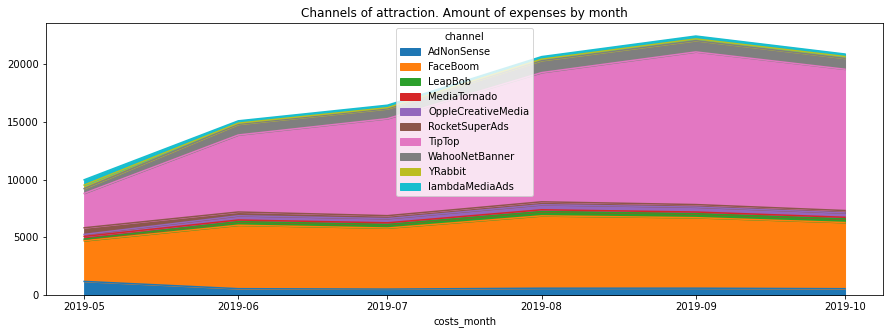

In [38]:
# let's create a pivot table and output a graph
costs_marketing.pivot_table(index = 'costs_month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(figsize = (15, 5), title='Channels of attraction. Amount of expenses by month');


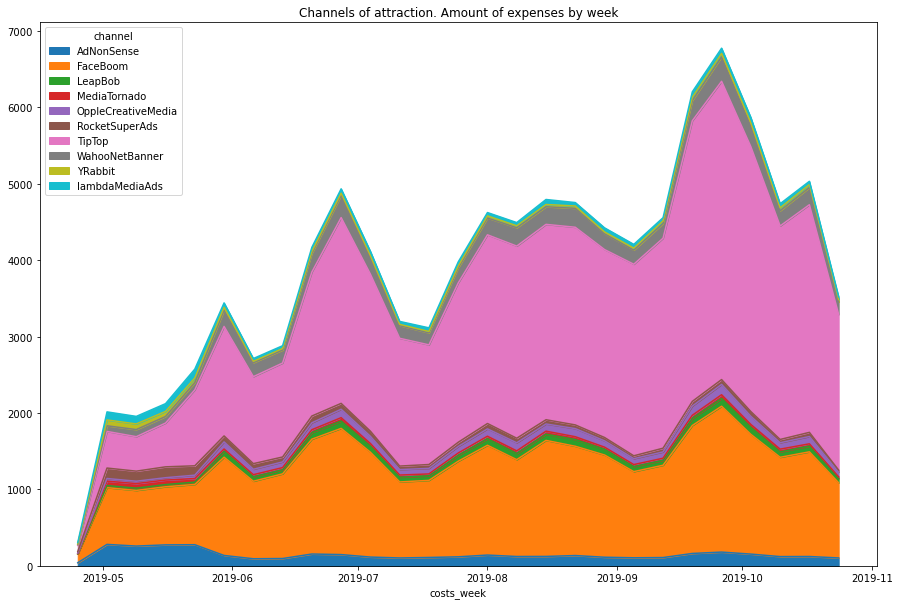

In [39]:
costs_marketing.pivot_table(index = 'costs_week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(figsize = (15, 10), title='Channels of attraction. Amount of expenses by week');

In [40]:
# we will remove organic visits

profiles = profiles.query('channel != "organic"')

In [41]:
# calculate the average
profiles['acquisition_cost'].mean()

1.127481323942928

In [42]:
# let's group the data by the cost of attraction
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending = False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

#### Marketing: conclusions

Based on the information received, we can draw conclusions:
* The most expensive channels for attracting users are TipTop and Facebook, both in terms of investing money and in attracting one user 
* The largest investment in advertising was made in September

### 5. Evaluation of the payback of advertising <a id='5'></a>

Using LTV and ROI:
- Analyze the overall payback of advertising;
- Analyze the payback of advertising by device;
- Analyze the payback of advertising by country;
- Analyze the payback of advertising by advertising channels.

Describe the problems you found. Answer the questions:
- Does advertising aimed at attracting users in general pay off? 
- Which devices, countries and advertising channels can have a negative impact on the payback of advertising?
- What can cause payback problems? Study conversion and retention by device, country, and advertising channels.

Describe the possible causes of the detected problems and make recommendations for the advertising department. When solving this step, consider that you are looking at the data on November 1, 2019 and that it is considered in your organization that payback should occur no later than 2 weeks after attracting users.

In [43]:
observation_date = datetime(2019, 11, 1).date()

In [44]:
# зададим горизонт в 14 дней
horizon_days = 14

In [45]:
profiles.head(3)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235


In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_log, observation_date, horizon_days
)

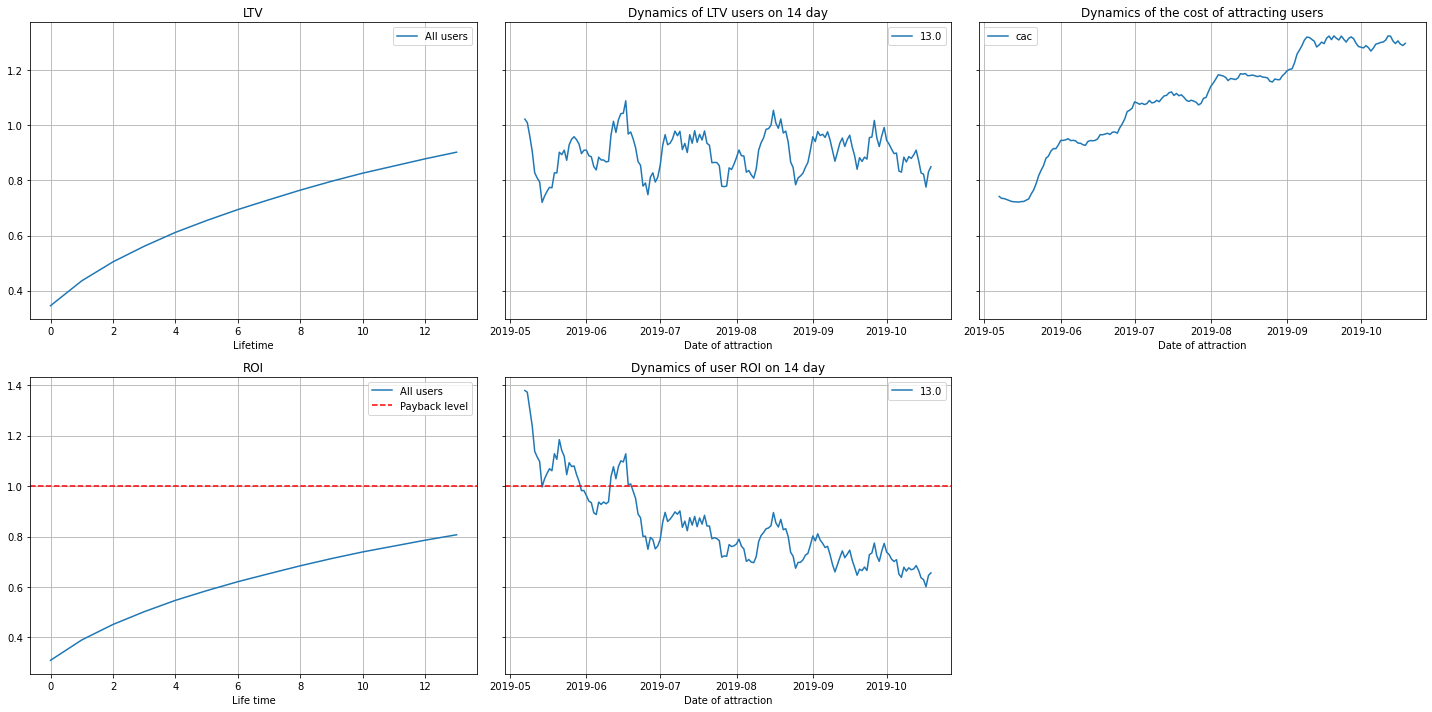

In [47]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Payback: conclusions
Based on the graphs, the following conclusions can be drawn:
* The dynamics of attraction goes up in May, they began to invest more money in marketing, then in June and September
* ROI has not overcome the payback level, and the dynamics of ROI is going down
* LTV is stable enough 

Let's take a closer look at the charts, make a breakdown by country, devices and channels of attraction

In [48]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_log, observation_date, horizon_days, dimensions = ['region']
)

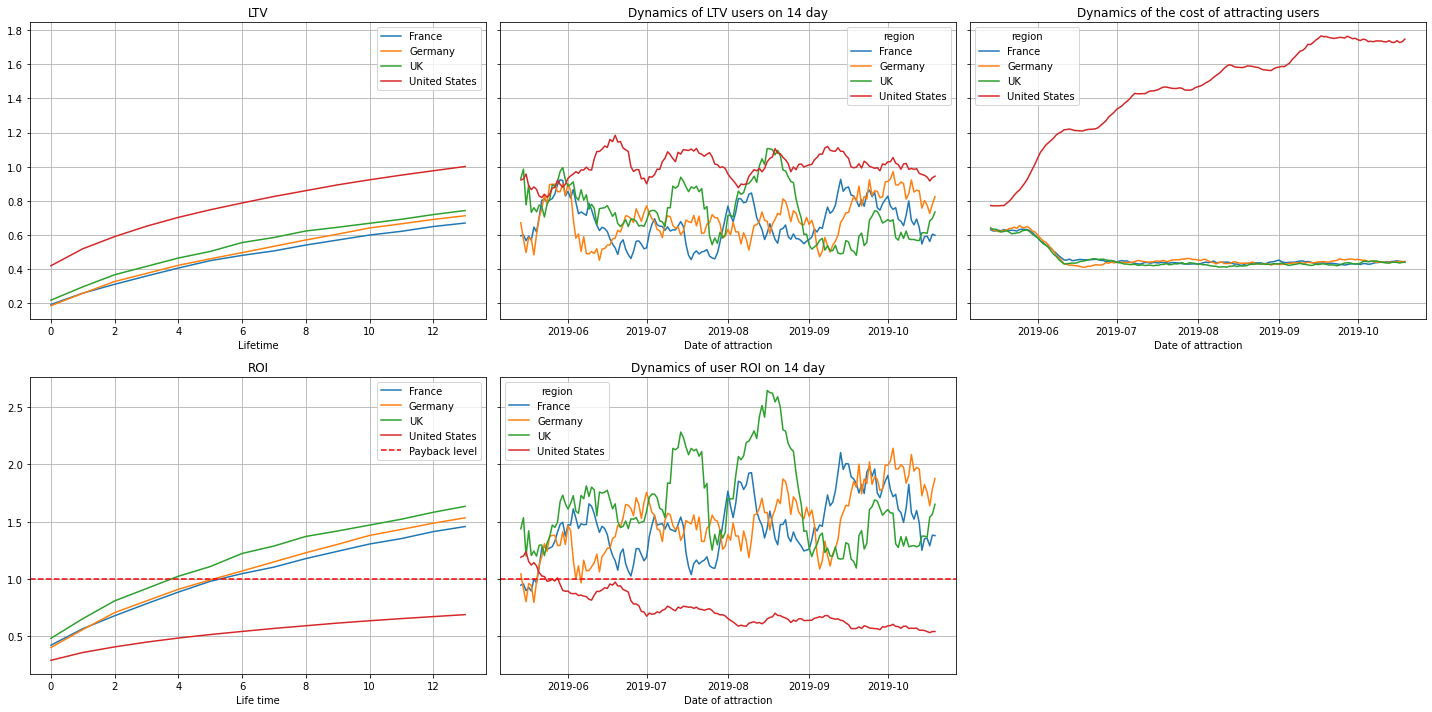

In [52]:
# for the convenience of evaluation, we will form all the graphs side by side
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

#### Conclusions by region
* LTV is still stable 
* The dynamics of attraction in all countries is approximately the same, except for USA
* ROI of all countries pays off, except USA.

The expensive attraction of users from the USA absolutely does not pay off, it is worth reviewing the plan, it may be worth paying attention to other countries, and with the USA to reconsider the strategy

In [53]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_log, observation_date, horizon_days, dimensions = ['channel']
)

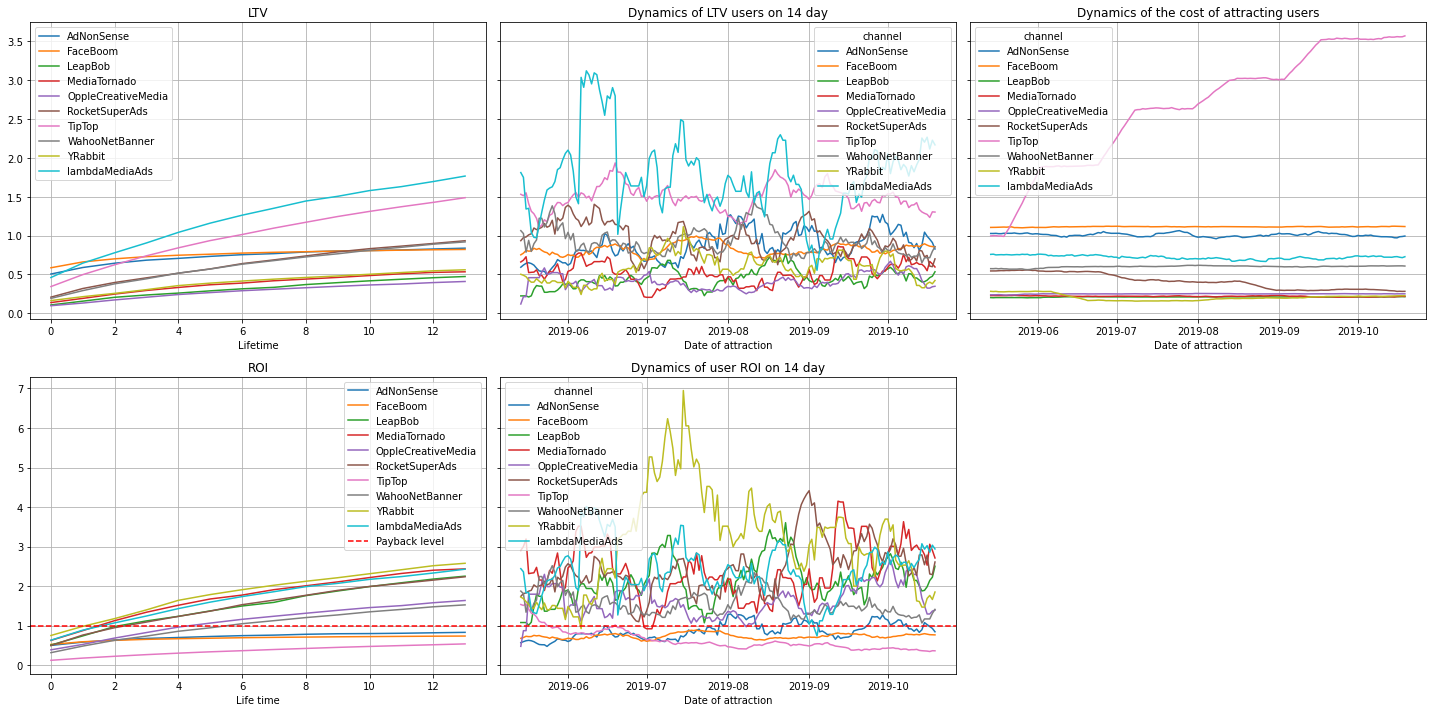

In [55]:
# for the convenience of evaluation, we will form all the graphs side by side
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

#### Conclusions on the channels of attraction
* Tiptop's CAC is very high, especially relative to their competitors
* LTV has 2 channels, "TipTop" and "lambdaMediaAds". 
* ROI of most channels - pays off. But "TipTop" brings losses. At the same time, the most expensive users are there.

It is worth paying attention to a less popular, but cheaper channel, such as "YRabbit", which pays off

In [56]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders_log, observation_date, horizon_days, dimensions = ['device']
)

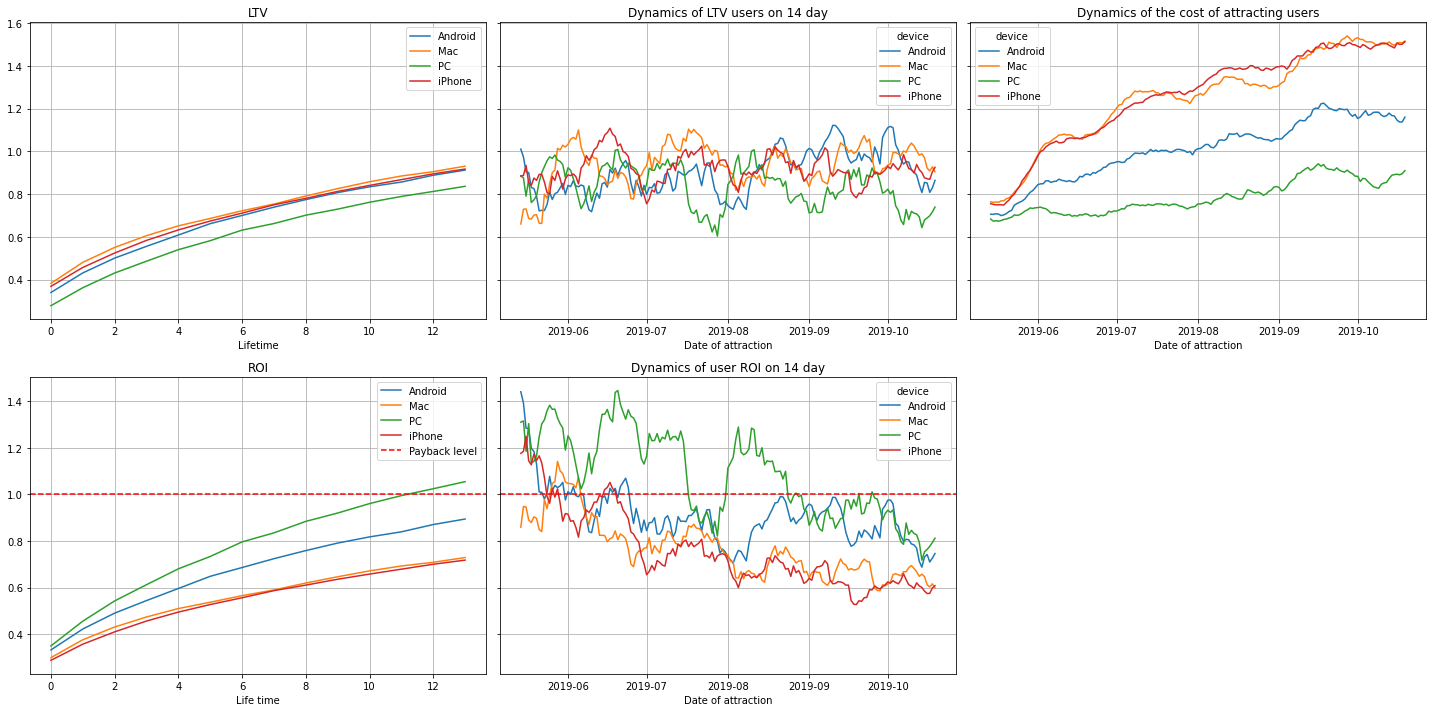

In [59]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

#### Conclusions on devices
* LTV is still stable on all devices
* CAC for Apple above the rest
* ROI, low, pays off only for PC

Attracting Apple is the most expensive

### Conversion

#### Конверсия: регионы

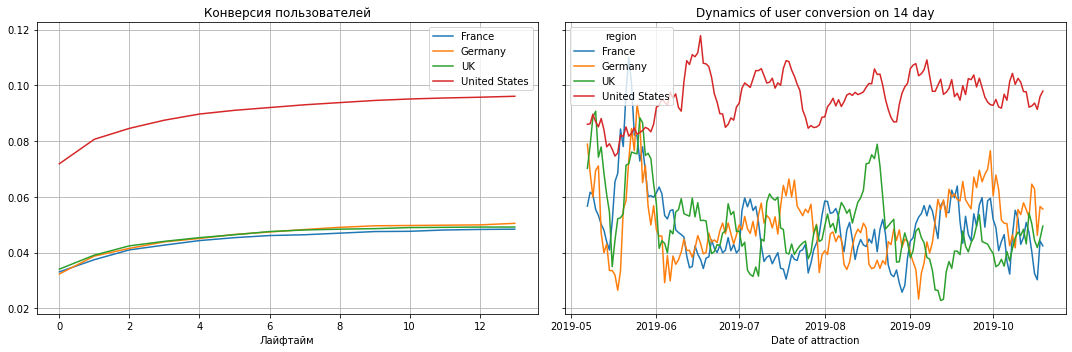

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_log, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The conversion rate of users from USA is the highest, there may be a problem in retention. The situation in other countries is about the same

#### Conversion: Devices

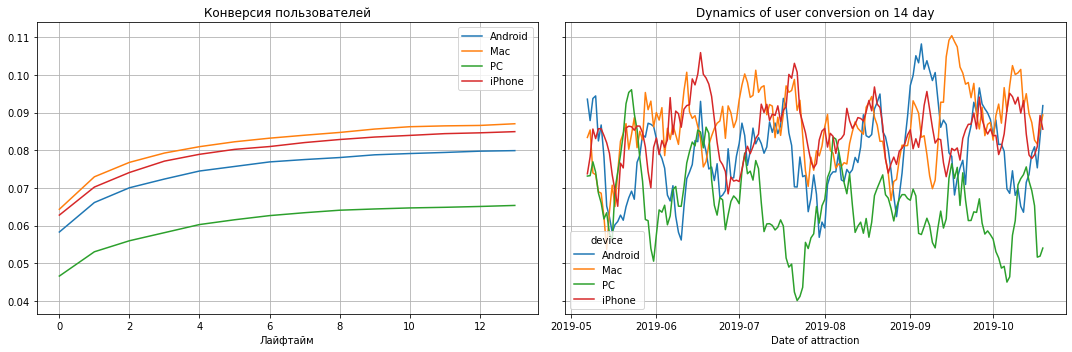

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_log, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

The same situation with Apple - they have a good conversion rate, perhaps also a problem in retention

#### Conversion: Channels

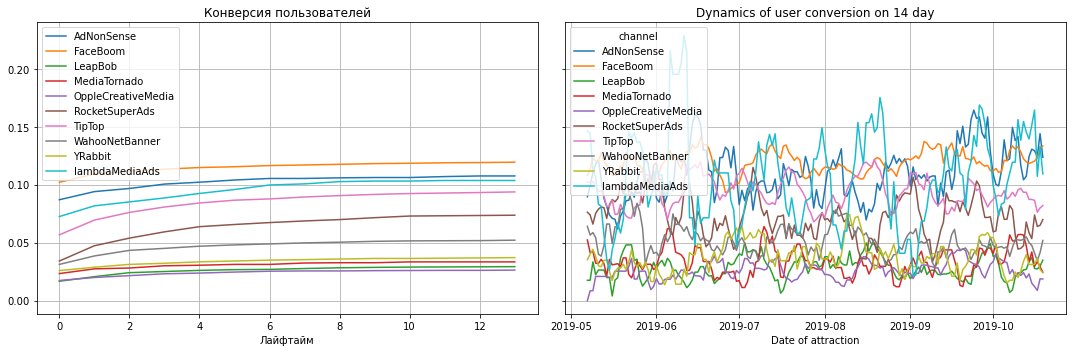

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_log, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Conversion through the channels of attraction also showed the leader of "Facebook", we will study his retention

### Retention

#### Retention, countries

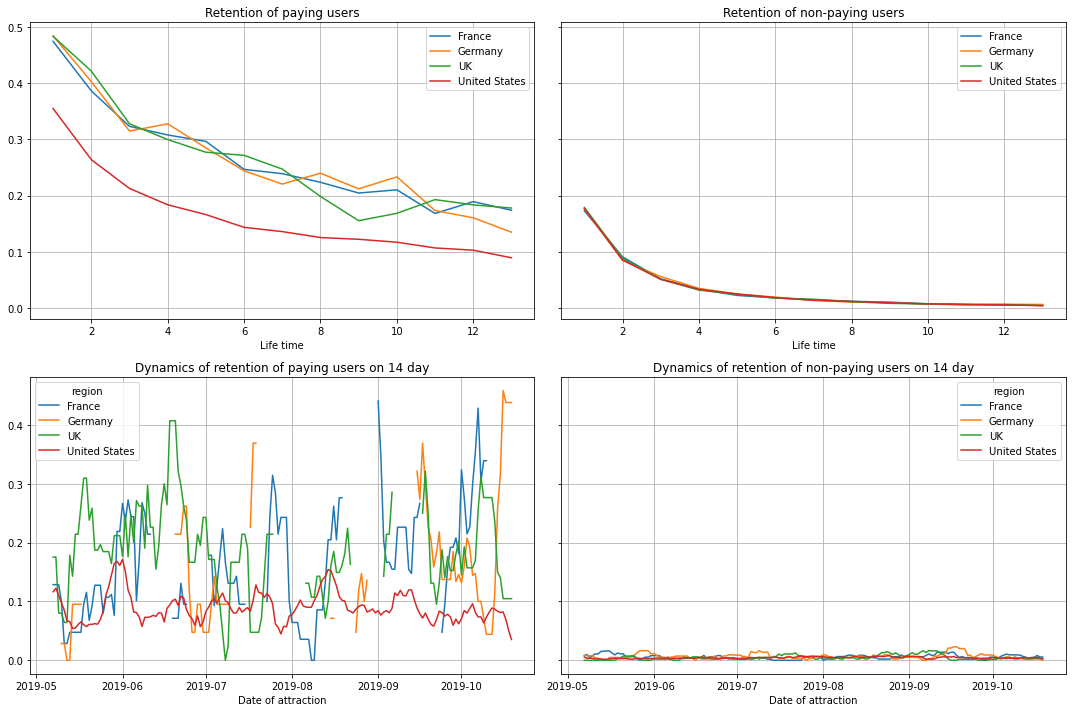

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_log, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

USA has the least retention of paying users, perhaps there are some problems here. Retention of non-paying users is normal.

#### Hold, devices

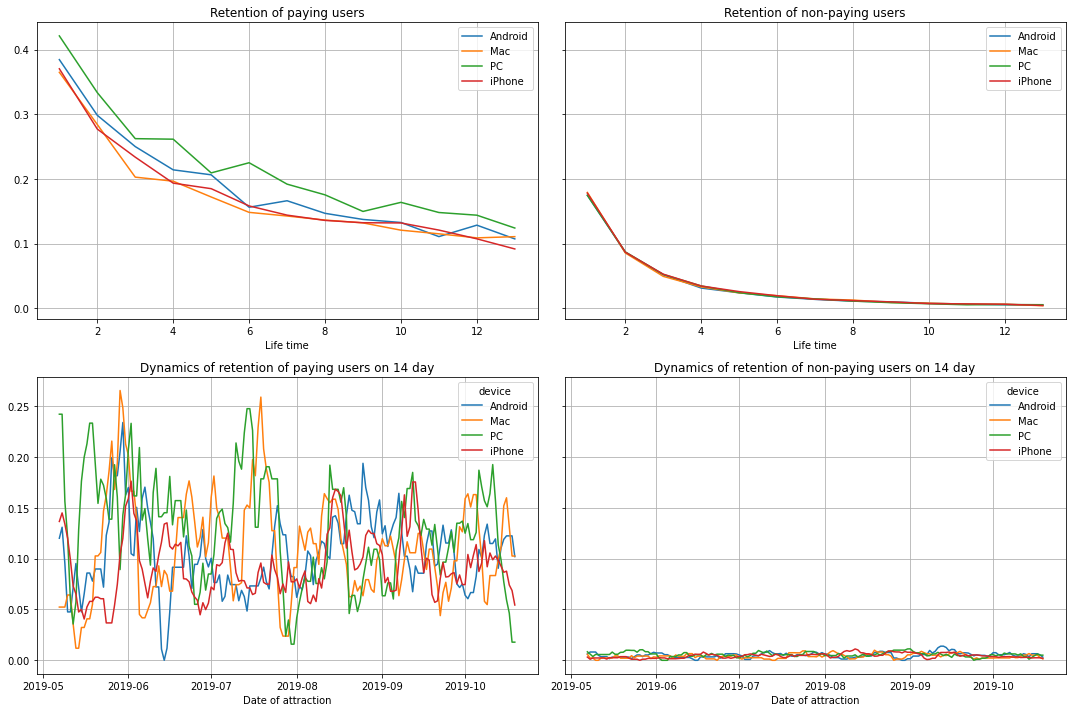

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_log, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

The retention by device is about the same, there are no problems here.

#### Retention: channels

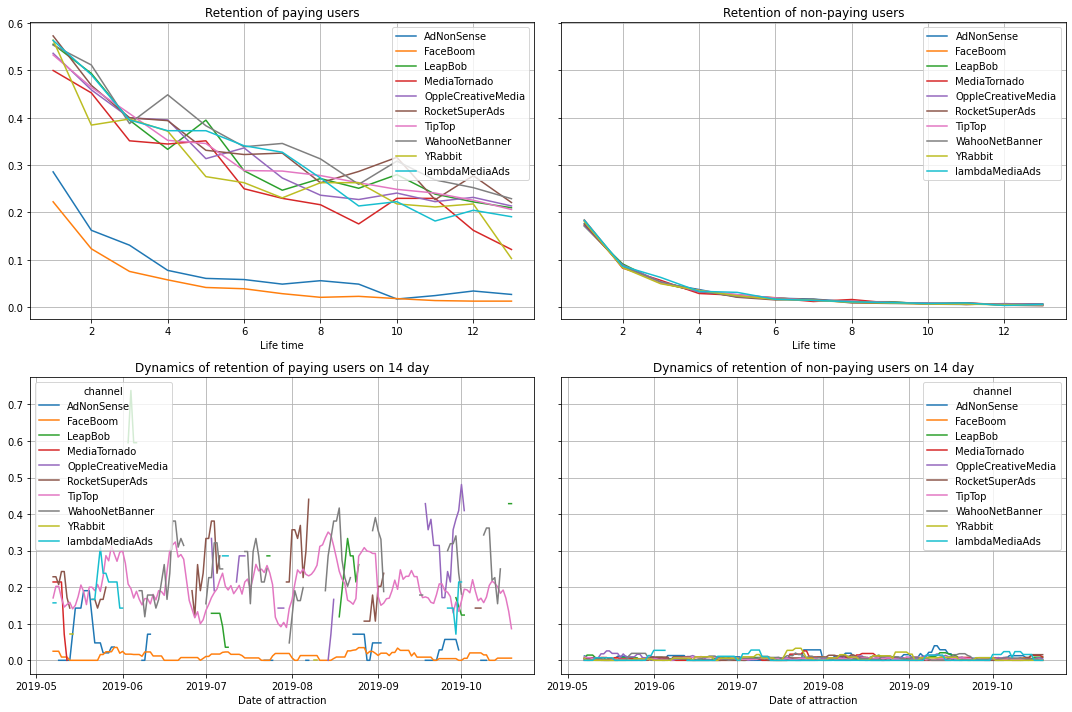

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_log, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Retention of paying users through channels showed that Facebook users are the least likely to stay with the product, with non-paying users the situation is approximately equal.

Two channels with poor retention are singled out separately: Facebook and Ad NonSense

## 6. General conclusion <a id='6'></a>

In the course of the analysis, the following steps were taken
* Data uploaded and verified
* Changed the data type responsible for the date
* Created functions for analysis
* Based on the data obtained, graphs are made

Conclusions on the research analysis:
* The top channel for attracting users is Organic, but it has the lowest coefficient of paying users, perhaps some measures can be taken here to improve this coefficient
* **PC users pay the least, perhaps there is some problem here. You can check the payment system for this group**

Marketing Conclusions:
* Total was spent on advertising on all channels 105 497.00

Top three leaders in terms of invested funds:
* Тip Top       54 751,30
* Facebook      32 445.60
* WahooNetBanner 5 151,00

The biggest expenditure on advertising was in September: 22441.340
At week 22 : 6773.700

The average cost of attracting 0.703

Top three leaders in the cost of attraction **(maximum price)**
* TipTop     2.799003
* Facebook   1.113286
* AdNonSense 1.008054

Top three leaders in the cost of attraction **(minimum price)**
* MediaTornado          0.218717
* LeapBob               0.210172
* organic               0.000000


Conclusions regarding the payback of advertising and user engagement (broken down by Device/Countries/Channels of attraction):

* Investing in attracting users from the USA brings losses, the ROI of this channel is approximately `70%` 
* Investments in the "TipTop" channel bring losses, a large amount of investments that do not pay off, but only reach up to `90%` ROI
* Investing in Apple brings losses

General conclusions:

* Total ROI - does not pay off, slightly above `80%` 
* CAC dynamics - high, reaches up to `1.2`
* LTV is stable 

Reasons for inefficiency in attracting users:

* A lot of money is spent on attracting users from the USA, which does not pay off, adjustments need to be made here.
* Apple's retention and conversion is stable, but ROI is unprofitable, perhaps advertising is too expensive here, and advertising on these devices should be abandoned.
* Facebook and TipTop attraction channels, while users who came from Facebook have the smallest retention, although they have a large conversion rate.

**General recommendations for improving the effectiveness of advertising:**

* Obvious problems with the USA, a lot of non-profit funds are spent here.
* Pay more attention to `PC` devices
* Pay attention to the channel `"YRabbit"` - with a relatively low CAC, the channel pays off well
* It may be worth considering steps to retain users for the cheapest channels of attraction, especially those who come from search (organic), because the number of these users is the highest, at the same time advertising costs are minimal here.
* Separately consider options for working with `"organic"` users, it is obvious that here the application has a huge potential, which can dramatically reduce advertising costs while maintaining a large number of new users